<a href="https://colab.research.google.com/github/madalenamakiesse/Scientific-Computing-with-Python-Projects/blob/main/vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Definição do Problema**
Este projecto aplica conceitos de Ciência de Dados para prever o preço de venda (PrVenda) de produtos com  base em características presentes no dataset para auxiliar na tomada de decisões sobre estratégias de precificação.

## **Objectivo**
* Treinar um modelo de regressão para prever o preço de venda dos produtos.

## **Variáveis em Estudo**

* **Variável Dependente (Target):**
  * PrVenda (preço de venda do produto).

* **Variáveis Independentes (Features):**
  * Data: Data da transação (pode capturar tendências ao longo do tempo).
  * Ano: Ano da transação (para análises de tendências anuais).
  * Mês: Mês da transação (para análises mensais).
  * CodCli: Código do cliente (identificação do cliente).
  * Cliente: Nome do cliente (informações sobre o cliente).
  * CodCom: Código do comercial (informações sobre quem vendeu o produto).
  * Comercial: Nome do comercial responsável pela venda.
  * IDProduto: Identificação única do produto.
  * Produto: Nome do produto.
  * Tipo: Tipo do produto (Formação, Hardware, Serviço, Software).
  * Subtipo: Subcategoria do produto (SmartPhone, Tablet, Office, PC e outros).
  * Qt: Quantidade vendida.
  * PrCusto: Preço de custo do produto (importante para determinar a margem de lucro).
  * Região: Região onde a venda foi realizada (pode haver variações de preço dependendo da região).
  * Meio de Pagamento: Método de pagamento utilizado (ex: Cheque, Débito, Dinheiro, Cartão de Crédito, MBWAY).

# Importação das Bibliotecas

In [143]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Compreensão dos Dados
Iniciou-se com o carregamento dos dados.
Para ter uma compreensão da estrutura do dataset, utilizou-se as funções head, info, e describe


In [144]:
# Carregamento dos dados
vendas_df = pd.read_excel('./Vendas.training.xlsx')

In [145]:
# Obter o número de linhas e  colunas
vendas_df.shape

(1543, 16)

In [146]:
vendas_df.keys()

Index(['Data', 'Ano', 'Mês', 'CodCli', 'Cliente', 'CodCom', 'Comercial',
       'IDProduto', 'Produto', 'Tipo', 'Subtipo', 'Qt', 'PrCusto', 'PrVenda',
       'Região', 'Meio de Pagamento'],
      dtype='object')

In [147]:
# Obter as primeiras 3 linhas
vendas_df.head(3)

,Data,Ano,Mês,CodCli,Cliente,CodCom,Comercial,IDProduto,Produto,Tipo,Subtipo,Qt,PrCusto,PrVenda,Região,Meio de Pagamento
0,2012-01-01,2012,jan,109,"FAREMI, LDA",1,Silva,7,"Samsung Galaxy Alpha 4G - 32GB, 4.7"" HD Super ...",Hardware,SmartPhone,8,260.807740,511.387726,Norte,Dinheiro
1,2012-01-01,2012,jan,26,"SOPORCEL - SOCIEDADE PORTUGUESA DE CELULOSE, S.A.",4,Fuller,33,Xperia Tablet Z2 16GB Wi-Fi Preto com Dock - F...,Hardware,Tablet,9,278.619602,335.686268,Centro,Dinheiro
2,2012-01-02,2012,jan,116,INOXPAL - INOXIDÁVEIS PARA A INDÚSTRIA ALIMENT...,4,Fuller,67,Word 2013 32/64 Portuguese PkLic Online Downlo...,Software,Office,8,40.400000,53.157895,Centro,MBWAY


In [148]:
# Obter a informação do dataset
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               1543 non-null   datetime64[ns]
 1   Ano                1543 non-null   int64         
 2   Mês                1543 non-null   object        
 3   CodCli             1543 non-null   int64         
 4   Cliente            1543 non-null   object        
 5   CodCom             1543 non-null   int64         
 6   Comercial          1543 non-null   object        
 7   IDProduto          1543 non-null   int64         
 8   Produto            1543 non-null   object        
 9   Tipo               1543 non-null   object        
 10  Subtipo            1543 non-null   object        
 11  Qt                 1543 non-null   int64         
 12  PrCusto            1543 non-null   float64       
 13  PrVenda            1543 non-null   float64       
 14  Região  

In [149]:
# Fazer uma análise descritiva dos dados numéricos
vendas_df.describe()

,Data,Ano,CodCli,CodCom,IDProduto,Qt,PrCusto,PrVenda
count,1543,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,2013-07-28 06:24:29.863901696,2013.062865,59.261828,5.771873,45.747246,5.470512,255.188046,367.546986
min,2012-01-01 00:00:00,2012.000000,2.000000,1.000000,1.000000,1.000000,10.863158,18.105263
25%,2012-11-16 12:00:00,2012.000000,20.000000,3.000000,23.000000,3.000000,77.237684,109.473684
50%,2013-08-05 00:00:00,2013.000000,53.000000,5.000000,46.000000,5.000000,184.600000,289.000000
75%,2014-04-21 12:00:00,2014.000000,101.000000,9.000000,68.000000,8.000000,301.533996,446.695412
max,2014-12-31 00:00:00,2014.000000,117.000000,12.000000,91.000000,10.000000,2460.253895,2928.873684
std,NaN,0.808075,41.696639,3.497609,26.030679,2.890838,338.936765,441.946091


# Preparação dos Dados

### Tratamento de dados ausentes

In [150]:
# Verificação de valores ausentes
ausentes = vendas_df.isnull().sum().sum()
ausentes

0

### Tratamento de dados duplicados

In [151]:
# Verificação de valores duplicados
duplicado = vendas_df.duplicated().sum().sum()
duplicado

0

### Tratamento de inconsistência nos dados

In [152]:
print(vendas_df['Mês'].unique())

['jan' 'fev' 'mar' 'abr' 'mai' 'jun' 'jul' 'ago' 'set' 'out' 'nov' 'dez']


In [153]:
print(vendas_df['Comercial'].unique())

['Silva' 'Fuller' 'Peacock' 'Leverling' 'Dodsworth' 'Davolio' 'Costa'
 'King' 'Callahan' 'Mendes' 'Buchanan' 'Suyama']


In [154]:
print(vendas_df['Tipo'].unique())

['Hardware' 'Software' 'Formação' 'Serviços']


In [155]:
print(vendas_df['Subtipo'].unique())

['SmartPhone' 'Tablet' 'Office' 'PC' 'Servidores' 'Presencial' 'Antivirus'
 'eLearning' 'bLearning' 'Configuração' 'Sist. Op.' 'Manutenção'
 'Instalação']


In [156]:
print(vendas_df['Região'].unique())

['Norte' 'Centro' 'Sul']


In [157]:
print(vendas_df['Meio de Pagamento'].unique())

['Dinheiro' 'MBWAY' 'Débito' 'Cartão de Crédito' 'Cheque']


### Codificação de Variáveis Categóricas

In [158]:
copia = vendas_df.copy()

In [159]:
label = LabelEncoder()
label.fit(copia['Data'].drop_duplicates())
copia['Data'] = label.transform(copia['Data'])
label.fit(copia['Mês'].drop_duplicates())
copia['Mês'] = label.transform(copia['Mês'])
label.fit(copia['Cliente'].drop_duplicates())
copia['Cliente'] = label.transform(copia['Cliente'])
label.fit(copia['Comercial'].drop_duplicates())
copia['Comercial'] = label.transform(copia['Comercial'])
label.fit(copia['Produto'].drop_duplicates())
copia['Produto'] = label.transform(copia['Produto'])
label.fit(copia['Tipo'].drop_duplicates())
copia['Tipo'] = label.transform(copia['Tipo'])
label.fit(copia['Subtipo'].drop_duplicates())
copia['Subtipo'] = label.transform(copia['Subtipo'])
label.fit(copia['Região'].drop_duplicates())
copia['Região'] = label.transform(copia['Região'])
label.fit(copia['Meio de Pagamento'].drop_duplicates())
copia['Meio de Pagamento'] = label.transform(copia['Meio de Pagamento'])

copia.dtypes

,0
Data,int64
Ano,int64
Mês,int64
CodCli,int64
Cliente,int64
CodCom,int64
Comercial,int64
IDProduto,int64
Produto,int64
Tipo,int64


### Padronização

In [160]:
scaler = StandardScaler()
copia[['Ano']] = scaler.fit_transform(copia[['Ano']])
copia[['Qt']] = scaler.fit_transform(copia[['Qt']])
copia[['PrCusto']] = scaler.fit_transform(copia[['PrCusto']])
copia[['CodCli']] = scaler.fit_transform(copia[['CodCli']])
copia[['CodCom']] = scaler.fit_transform(copia[['CodCom']])
copia[['IDProduto']] = scaler.fit_transform(copia[['IDProduto']])

copia.head()

,Data,Ano,Mês,CodCli,Cliente,CodCom,Comercial,IDProduto,Produto,Tipo,Subtipo,Qt,PrCusto,PrVenda,Região,Meio de Pagamento
0,0,-1.315731,4,1.193245,13,-1.364767,10,-1.489005,55,1,9,0.875285,0.016586,511.387726,1,2
1,0,-1.315731,4,-0.797969,37,-0.506760,5,-0.489860,79,1,10,1.221318,0.069155,335.686268,0,2
2,1,-1.315731,4,1.361178,19,-0.506760,5,0.816715,76,3,4,0.875285,-0.633917,53.157895,0,4
3,2,-1.315731,4,1.025311,35,0.637249,9,-0.451431,78,1,10,-0.508845,-0.037298,332.260898,1,4
4,2,-1.315731,4,0.713434,1,0.923252,7,-0.758860,20,1,10,-0.162812,0.387815,522.419334,1,4


# Análise Exploratória dos Dados

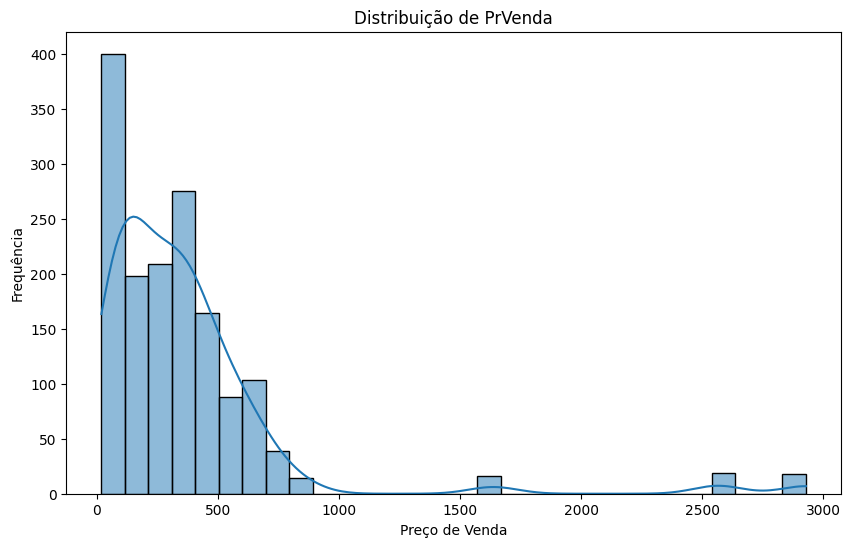

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(vendas_df['PrVenda'], bins=30, kde=True)
plt.title('Distribuição de PrVenda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

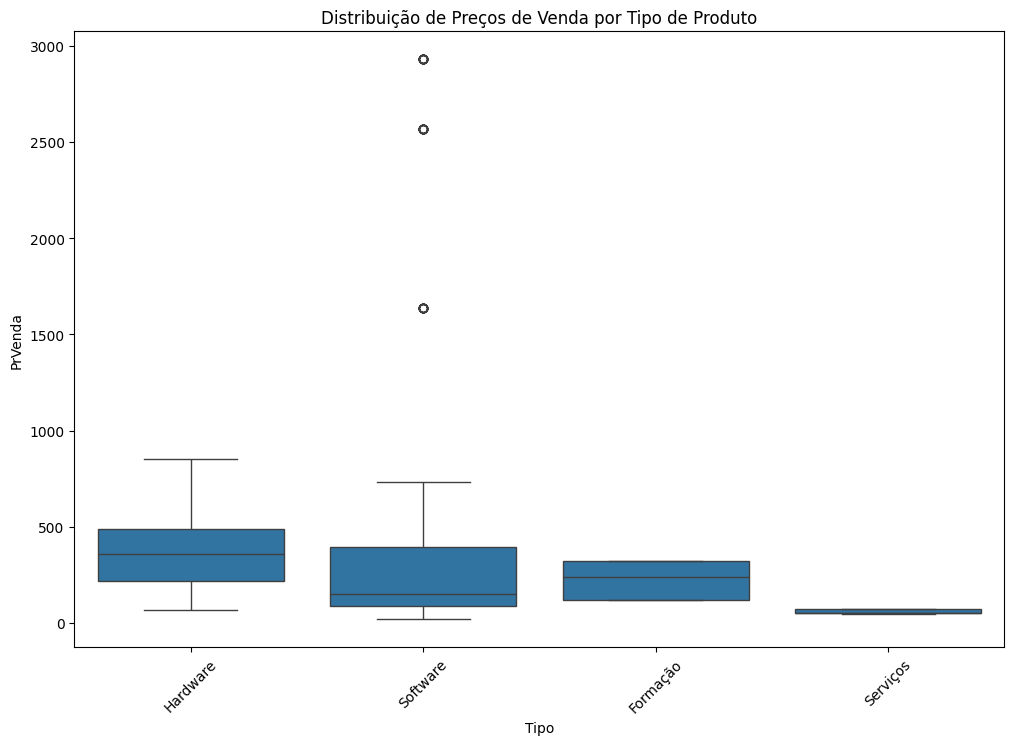

In [162]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo', y='PrVenda', data=vendas_df)
plt.title('Distribuição de Preços de Venda por Tipo de Produto')
plt.xticks(rotation=45)
plt.show()

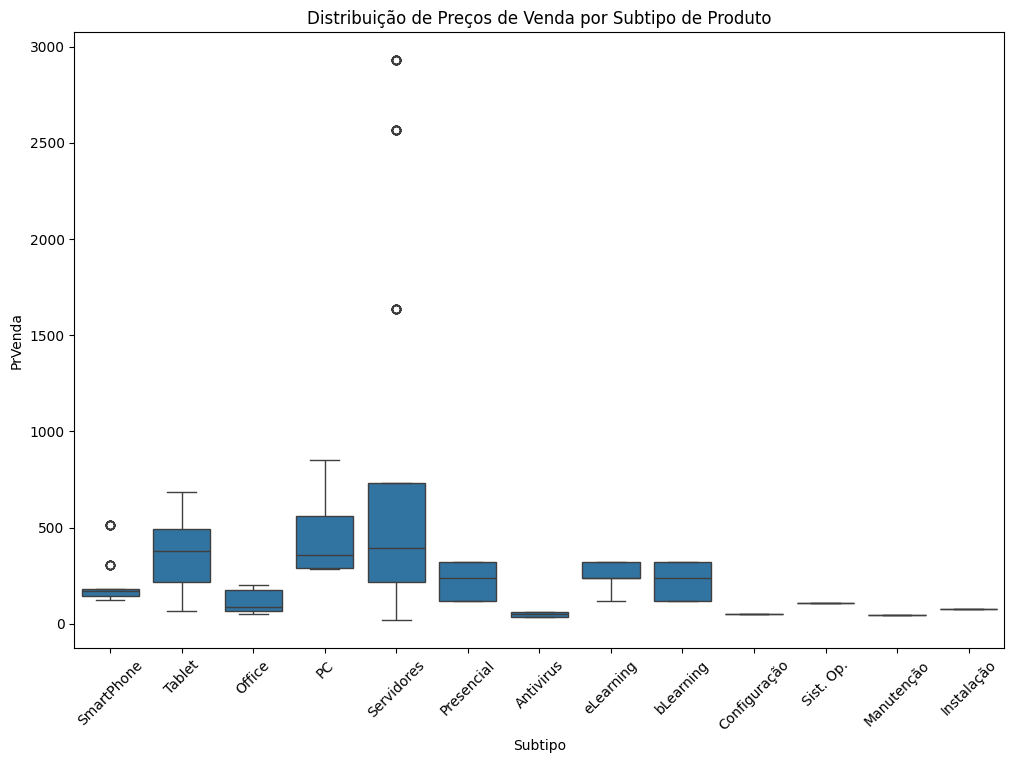

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subtipo', y='PrVenda', data=vendas_df)
plt.title('Distribuição de Preços de Venda por Subtipo de Produto')
plt.xticks(rotation=45)
plt.show()

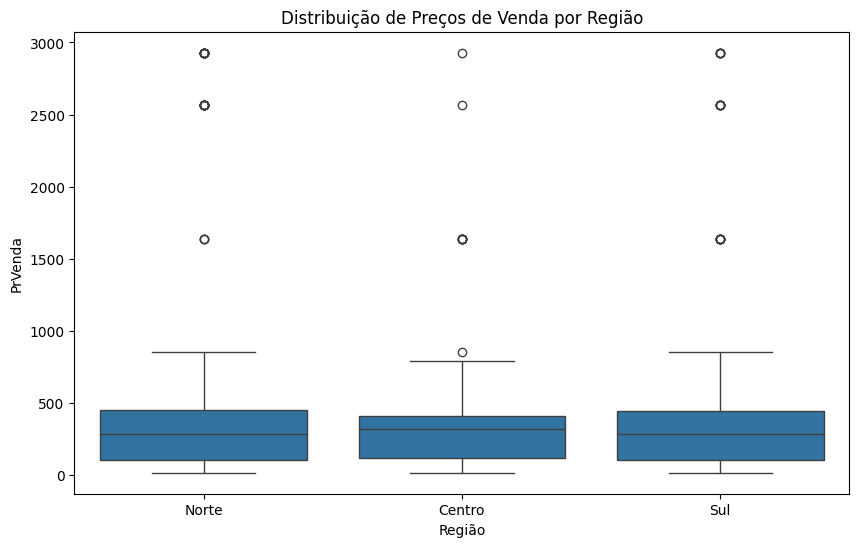

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Região', y='PrVenda', data=vendas_df)
plt.title('Distribuição de Preços de Venda por Região')
plt.show()

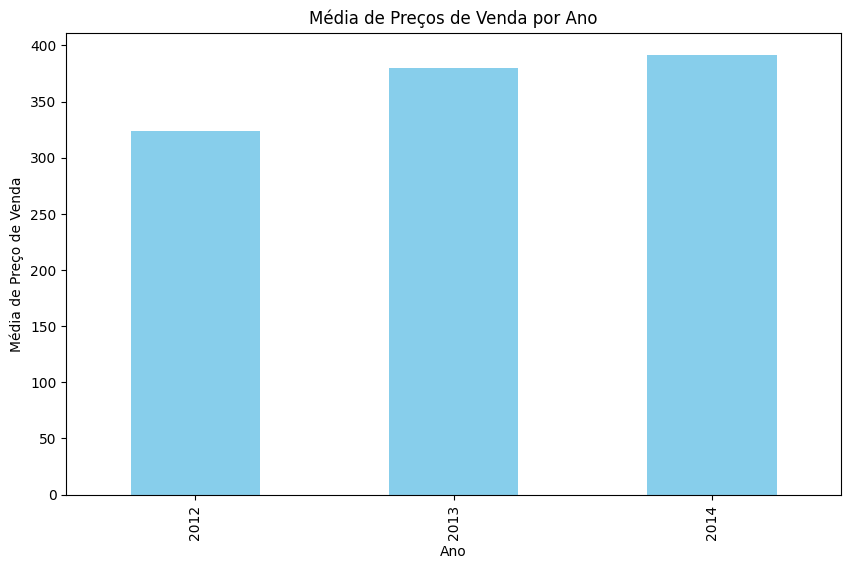

In [165]:
# Média de PrVenda por ano
vendas_df.groupby('Ano')['PrVenda'].mean().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Média de Preços de Venda por Ano')
plt.ylabel('Média de Preço de Venda')
plt.show()

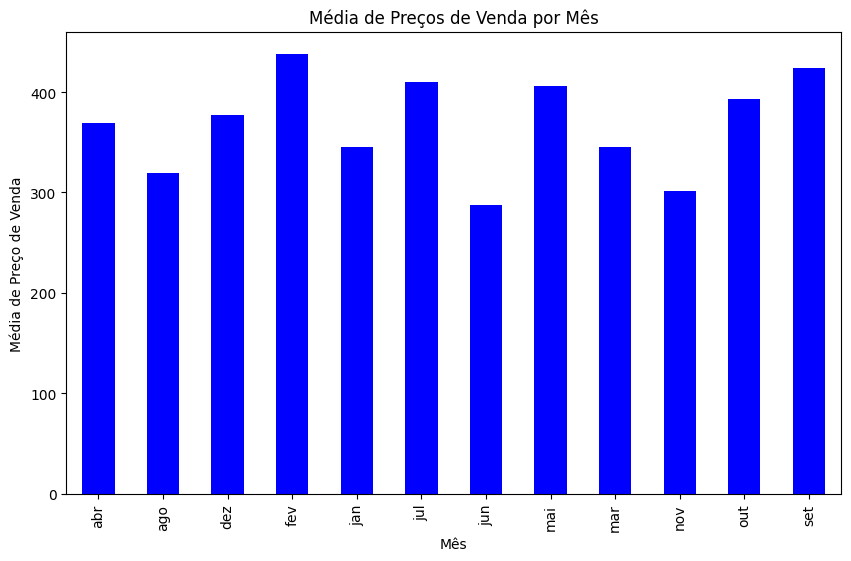

In [166]:
# Média de PrVenda por mês
vendas_df.groupby('Mês')['PrVenda'].mean().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Média de Preços de Venda por Mês')
plt.ylabel('Média de Preço de Venda')
plt.show()

# Tratamento de Dados

In [167]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = copia.drop(columns=['PrVenda'])  # As colunas que não são 'PrVenda' serão as variáveis independentes
y = copia['PrVenda']  # A coluna de Preço de Venda é o target

In [168]:
# Selecionar o top 5 das variáveis
k = 5  # quero apenas 5 das 15 features
select_k_best = SelectKBest(score_func=f_regression, k=k)

# Treinar o modelo
X_selecionado = select_k_best.fit_transform(X, y)

# Receber a pontuação de cada variável
pontuacoes_var = select_k_best.scores_

# Criar um dataframe para as colunas selecionadas
variaveis = X.columns
pontuacoes_var_df = pd.DataFrame({'Feature': variaveis, 'Score': pontuacoes_var})

# Ordenar pela pontuação
best_features = feature_scores_df.sort_values(by='Score', ascending=False)
print(best_features.head(k))

X_selecionado = select_k_best.transform(X)


    Feature         Score
12  PrCusto  59263.626541
9      Tipo     17.759540
10  Subtipo     12.851002
8   Produto     12.240272
1       Ano      5.767350


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_selecionado, y, test_size=0.2, random_state=42)

# Exibir tamanhos dos conjuntos de treino e teste
print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')

Tamanho do conjunto de treino: 1234
Tamanho do conjunto de teste: 309


# Machine Learning

In [170]:
# Instanciando e treinando o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Fazendo previsões
lr_pr = lr_model.predict(X_test)

# Avaliando o desempenho do modelo (usando Mean Squared Error)
lr_mse = mean_squared_error(y_test, lr_pr)
print(f'Erro quadrático médio - Regressão Linear: {lr_mse}')

Erro quadrático médio - Regressão Linear: 4304.527089435679


In [171]:
# Instanciando e treinando o modelo de Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Fazendo previsões
dt_pr = dt_model.predict(X_test)

# Avaliando o desempenho do modelo
dt_mse = mean_squared_error(y_test, dt_pr)
print(f'Erro quadrático médio - Árvore de Decisão: {dt_mse}')

Erro quadrático médio - Árvore de Decisão: 1.4511977118570614e-26


In [172]:
# Instanciando e treinando o modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Fazendo previsões
rf_pr = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
rf_mse = mean_squared_error(y_test, rf_pr)
print(f'Erro quadrático médio - Random Forest: {rf_mse}')

Erro quadrático médio - Random Forest: 0.006357187343847651


## Validação do Modelo

In [173]:
def rmse_cv(modelo, X, y):
    # Validação cruzada com 10 folds (cv=10), calculando RMSE para cada fold
    rmse = np.sqrt(-cross_val_score(modelo, X, y, scoring="neg_mean_squared_error", cv=10))
    return rmse

In [174]:
lr_modelo = LinearRegression()
dt_modelo = DecisionTreeRegressor(random_state=42)
rf_modelo = RandomForestRegressor(random_state=42, n_estimators=100)

In [175]:
lr_rmse = rmse_cv(lr_modelo, X_selecionado, y)
dt_rmse = rmse_cv(dt_modelo, X_selecionado, y)
rf_rmse = rmse_cv(rf_modelo, X_selecionado, y)

# Exibindo os resultados
print(f"RMSE médio - Regressão Linear: {lr_rmse.mean():.4f}, Desvio padrão: {lr_rmse.std():.4f}")
print(f"RMSE médio - Árvore de Decisão: {dt_rmse.mean():.4f}, Desvio padrão: {dt_rmse.std():.4f}")
print(f"RMSE médio - Random Forest: {rf_rmse.mean():.4f}, Desvio padrão: {rf_rmse.std():.4f}")

RMSE médio - Regressão Linear: 70.4809, Desvio padrão: 7.2975
RMSE médio - Árvore de Decisão: 0.0000, Desvio padrão: 0.0000
RMSE médio - Random Forest: 0.0345, Desvio padrão: 0.0419


## Teste

In [179]:
teste = copia.iloc[11].to_frame().transpose()
teste

,Data,Ano,Mês,CodCli,Cliente,CodCom,Comercial,IDProduto,Produto,Tipo,Subtipo,Qt,PrCusto,PrVenda,Região,Meio de Pagamento
11,6.0,-1.315731,4.0,-0.84595,23.0,-1.364767,10.0,-0.912575,35.0,1.0,10.0,0.875285,-0.427735,149.0,1.0,2.0


In [180]:
teste_ = teste.copy()
teste_ = teste_.drop(columns=['PrVenda'])
teste_ = select_k_best.transform(teste_)
print(teste_)

[[-1.31573144 35.          1.         10.         -0.42773475]]


In [181]:
predicao = dt_model.predict(teste_)

# Exibindo a previsão
print(f'A previsão do modelo para os dados de entrada é: {predicao[0]}')

A previsão do modelo para os dados de entrada é: 149.0


# Salvar o modelo para o Team DEV

In [184]:
# Salvar o modelo
import joblib

joblib.dump(dt_model, 'decisionTreeModel.pkl')

['decisionTreeModel.pkl']